Import libraries:

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Create data path:

In [2]:
# Create data path
path = r"C:\Users\Jason\Instacart Basket Analysis"

Importing data set used in Exercise 4.9 - Part 1:

In [3]:
# Importing new merged dataframe
df_customer_ords_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
df_customer_ords_merged.shape

(32404859, 32)

In [5]:
df_customer_ords_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Unnamed: 0,First Name,Surname,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,134862,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart. - Attached in another notebook called Practice 4.9 (1) and Practice 4.9 (2)

3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

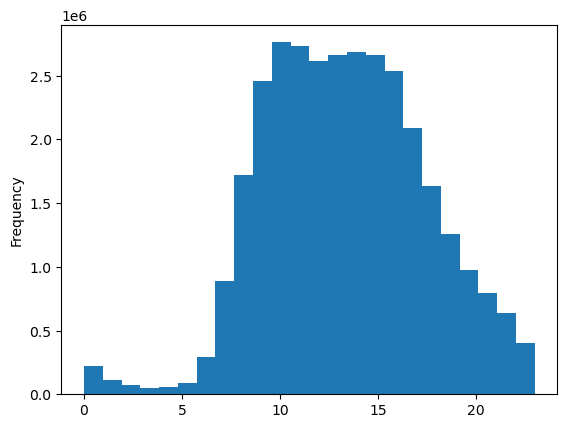

In [6]:
# Creating a histogram for 'order_hour_of_day' with 24 bins
hist = df_customer_ords_merged['order_hour_of_day'].plot.hist(bins = 24)

As seen in the histogram above, the busiest hours tend to be between the hours of 8am - 4pm. We see a drop off after the 4pm slot.

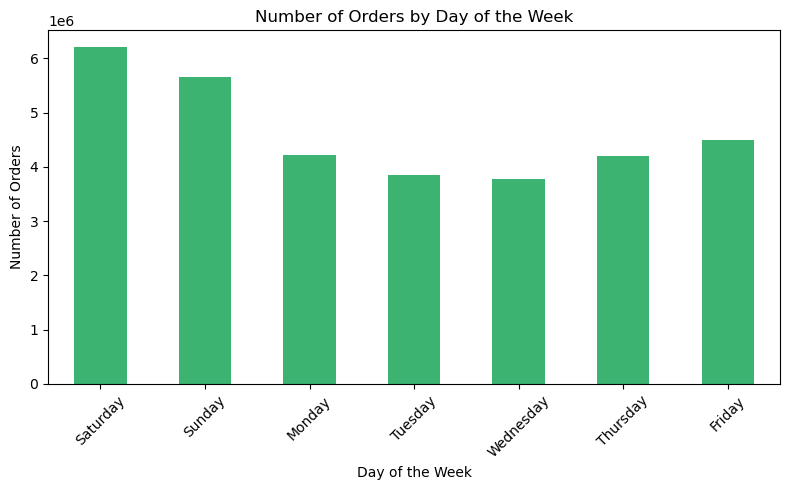

In [25]:
import matplotlib.pyplot as plt7

# Create a mapping from numeric day to day name as per the Achievement brief
day_map = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

df_customer_ords_merged['day_name'] = df_customer_ords_merged['orders_day_of_week'].map(day_map)

order_counts_named = df_customer_ords_merged['day_name'].value_counts().reindex(day_map.values())

# Plot the bar chart
plt7.figure(figsize=(8, 5))
order_counts_named.plot(kind='bar', color='mediumseagreen')

# Customize the plot
plt7.title('Number of Orders by Day of the Week')
plt7.xlabel('Day of the Week')
plt7.ylabel('Number of Orders')
plt7.xticks(rotation=45)

plt7.tight_layout()
plt7.show()

4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

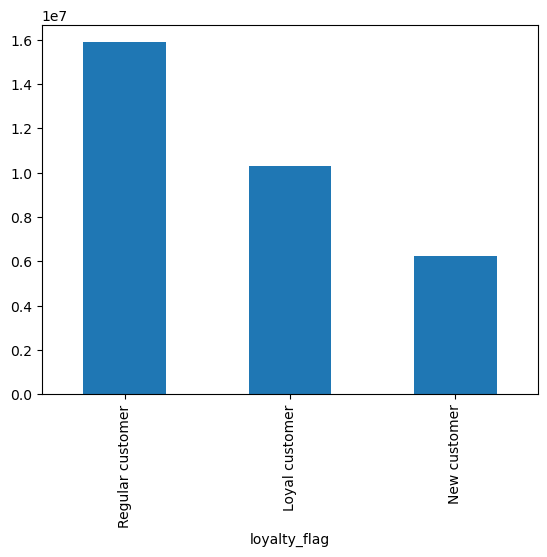

In [7]:
# Creating a bar chart from the 'loyalty_flag' column
bar = df_customer_ords_merged['loyalty_flag'].value_counts().plot.bar()

In [8]:
df_customer_ords_merged['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [9]:
# Creating an accurate sample for the line chart
np.random.seed(4)

In [10]:
# Creating an accurate sample for the line chart
dev = np.random.rand(len(df_customer_ords_merged)) <= 0.7

In [11]:
# Creating an accurate sample for the line chart
big = df_customer_ords_merged[dev]

In [12]:
# Creating an accurate sample for the line chart
small = df_customer_ords_merged[~dev]

In [13]:
# Reviewing output
len(df_customer_ords_merged)

32404859

In [14]:
# Reviewing output
len(big) + len (small)

32404859

In [15]:
# Creating 'relevant_columns' variable for the chart
df_relevant_columns = small[['prices', 'order_hour_of_day']]

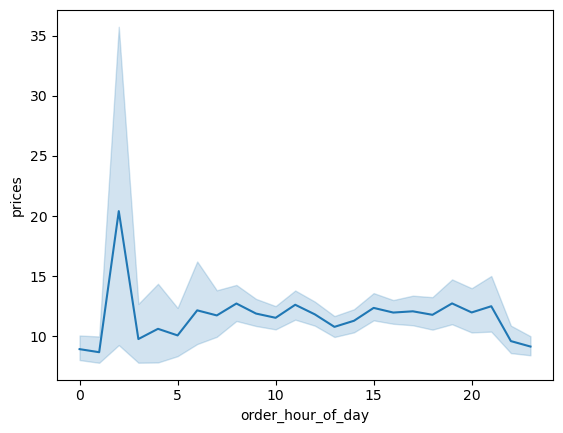

In [16]:
# Creating line chart
line = sns.lineplot(data = df_relevant_columns, x = 'order_hour_of_day', y = 'prices')

From the chart, it is clear that there is a difference in expenditure depending on the hour of the day.
- We see high prices in the night hours and consistent order volume through the working day (8am-4pm again)
- We see a fall in orders and prices in the evening after 8pm, which leads back to the massive rise in betwee 12am - 5am.

Exporting graphs:

In [17]:
# Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'order_hour_day_histogram.png'))

In [18]:
# Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyalty_bar.png'))

In [19]:
# Line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'expenditure_line.png'))

In [26]:
# Histogram 2
plt7.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'busiest_days.png'))

<Figure size 640x480 with 0 Axes>